# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['tuatapere',
 'manokwari',
 'sitka',
 'butterworth',
 'vaini',
 'cape town',
 'nikolskoye',
 'sokone',
 'busselton',
 'chantada',
 'grand river south east',
 'kaseda',
 'rikitea',
 'brownwood',
 'byron bay',
 'hualmay',
 'mahon',
 'taolanaro',
 'bredasdorp',
 'mitsamiouli',
 'torbay',
 'castro',
 'acapulco',
 'lompoc',
 'linchuan',
 'gobabis',
 'lalibela',
 'hithadhoo',
 'cabra',
 'coquimbo',
 'orangeville',
 'aykhal',
 'ushuaia',
 'ponta do sol',
 'albany',
 'upernavik',
 'pacific grove',
 'chuy',
 'hambantota',
 'tuktoyaktuk',
 'bengkulu',
 'ocos',
 'lata',
 'beipiao',
 'ust-nera',
 'northam',
 'same',
 'batagay-alyta',
 'tari',
 'qaanaaq',
 'otavi',
 'utinga',
 'puerto del rosario',
 'sampit',
 'punta arenas',
 'ponta delgada',
 'mataura',
 'comodoro rivadavia',
 'puerto ayora',
 'kapaa',
 'karpathos',
 'balclutha',
 'bluff',
 'amderma',
 'atuona',
 'ancud',
 'dwarka',
 'launceston',
 'belushya guba',
 'ribeira grande',
 'akom',
 'avarua',
 'urumqi',
 'provideniya',
 'ajdabiya',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""     
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df["Date"] = "" 


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + '&units='+ units + "&q=" + city 
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = weather_response["dt"]
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = weather_response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | tuatapere.
Processing Record 1  of Set 1 | manokwari.
Processing Record 2  of Set 1 | sitka.
Processing Record 3  of Set 1 | butterworth.
Processing Record 4  of Set 1 | vaini.
Processing Record 5  of Set 1 | cape town.
Processing Record 6  of Set 1 | nikolskoye.
Processing Record 7  of Set 1 | sokone.
Processing Record 8  of Set 1 | busselton.
Processing Record 9  of Set 1 | chantada.
Processing Record 10  of Set 1 | grand river south east.
City not found...skipping grand river south east.
Processing Record 11  of Set 1 | kaseda.
Processing Record 12  of Set 1 | rikitea.
Processing Record 13  of Set 1 | brownwood.
Processing Record 14  of Set 1 | byron bay.
Processing Record 15  of Set 1 | hualmay.
Processing Record 16  of Set 1 | mahon.
Processing Record 17  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 18  of Set 1 | bredasdorp.
Processing Record 19  of Set 1 | mitsa

Processing Record 29  of Set 4 | kisangani.
Processing Record 30  of Set 4 | salekhard.
Processing Record 31  of Set 4 | quatre cocos.
Processing Record 32  of Set 4 | grindavik.
Processing Record 33  of Set 4 | hobart.
Processing Record 34  of Set 4 | kutum.
Processing Record 35  of Set 4 | cumaribo.
City not found...skipping cumaribo.
Processing Record 36  of Set 4 | taltal.
Processing Record 37  of Set 4 | neiafu.
Processing Record 38  of Set 4 | cidreira.
Processing Record 39  of Set 4 | taoudenni.
Processing Record 40  of Set 4 | pisco.
Processing Record 41  of Set 4 | dedza.
Processing Record 42  of Set 4 | newberry.
Processing Record 43  of Set 4 | sao filipe.
Processing Record 44  of Set 4 | devils lake.
Processing Record 45  of Set 4 | sentyabrskiy.
City not found...skipping sentyabrskiy.
Processing Record 46  of Set 4 | margate.
Processing Record 47  of Set 4 | colares.
Processing Record 48  of Set 4 | esperance.
Processing Record 49  of Set 4 | henties bay.
Processing Record

Processing Record 7  of Set 8 | uwayl.
City not found...skipping uwayl.
Processing Record 8  of Set 8 | nanchang.
Processing Record 9  of Set 8 | key west.
Processing Record 10  of Set 8 | satitoa.
City not found...skipping satitoa.
Processing Record 11  of Set 8 | geraldton.
Processing Record 12  of Set 8 | cefalu.
Processing Record 13  of Set 8 | kongolo.
Processing Record 14  of Set 8 | miyako.
Processing Record 15  of Set 8 | muros.
Processing Record 16  of Set 8 | vila franca do campo.
Processing Record 17  of Set 8 | posadas.
Processing Record 18  of Set 8 | mnogovershinnyy.
Processing Record 19  of Set 8 | saint-augustin.
Processing Record 20  of Set 8 | ternova.
Processing Record 21  of Set 8 | vega de alatorre.
Processing Record 22  of Set 8 | maxixe.
Processing Record 23  of Set 8 | langfang.
Processing Record 24  of Set 8 | talnakh.
Processing Record 25  of Set 8 | saldanha.
Processing Record 26  of Set 8 | banjarmasin.
Processing Record 27  of Set 8 | plouzane.
Processing R

Processing Record 35  of Set 11 | dunda.
Processing Record 36  of Set 11 | magui.
City not found...skipping magui.
Processing Record 37  of Set 11 | babanusah.
City not found...skipping babanusah.
Processing Record 38  of Set 11 | tevriz.
Processing Record 39  of Set 11 | kushmurun.
Processing Record 40  of Set 11 | ambon.
Processing Record 41  of Set 11 | kupang.
Processing Record 42  of Set 11 | hoa binh.
Processing Record 43  of Set 11 | bardiyah.
Processing Record 44  of Set 11 | labuhan.
Processing Record 45  of Set 11 | ilheus.
Processing Record 46  of Set 11 | ibague.
Processing Record 47  of Set 11 | cockburn harbour.
City not found...skipping cockburn harbour.
Processing Record 48  of Set 11 | haysville.
Processing Record 49  of Set 11 | wesselsbron.
Processing Record 0  of Set 12 | ouesso.
Processing Record 1  of Set 12 | dargaville.
Processing Record 2  of Set 12 | dolbeau.
City not found...skipping dolbeau.
Processing Record 3  of Set 12 | coos bay.
Processing Record 4  of 

In [72]:
weather_df.dtypes

City                 object
Country              object
Latitude            float64
Longitude           float64
Cloudiness (%)      float64
Humidity (%)        float64
Max Temp (F)        float64
Wind Speed (mph)    float64
Date                float64
dtype: object

In [73]:
# Convert data strings to float
weather_df["Cloudiness (%)"] = pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
weather_df["Humidity (%)"] = pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
weather_df["Latitude"] = pd.to_numeric(weather_df["Latitude"]).astype(float)
weather_df["Longitude"] = pd.to_numeric(weather_df["Longitude"]).astype(float)
weather_df["Max Temp (F)"] = pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
weather_df["Wind Speed (mph)"] = pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df["Date"] = pd.to_numeric(weather_df["Date"]).astype(float)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")
weather_df.head()

,City,Country,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),Date
0,tuatapere,NZ,-46.1333,167.6833,25.0,88.0,48.18,2.84,1.652595e+09
1,manokwari,ID,-0.8667,134.0833,61.0,75.0,82.96,3.80,1.652595e+09
2,sitka,US,57.0531,-135.3300,75.0,76.0,46.29,5.75,1.652595e+09
3,butterworth,MY,5.3991,100.3638,20.0,70.0,91.44,10.36,1.652595e+09
4,vaini,TO,-21.2000,-175.2000,100.0,59.0,73.92,14.36,1.652595e+09


In [75]:
len(weather_df)

631

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
weather_df.drop(weather_df[weather_df['Humidity (%)'] > 100].index, inplace = True)
weather_df

,City,Country,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),Date
0,tuatapere,NZ,-46.1333,167.6833,25.0,88.0,48.18,2.84,1.652595e+09
1,manokwari,ID,-0.8667,134.0833,61.0,75.0,82.96,3.80,1.652595e+09
2,sitka,US,57.0531,-135.3300,75.0,76.0,46.29,5.75,1.652595e+09
3,butterworth,MY,5.3991,100.3638,20.0,70.0,91.44,10.36,1.652595e+09
4,vaini,TO,-21.2000,-175.2000,100.0,59.0,73.92,14.36,1.652595e+09
...,...,...,...,...,...,...,...,...,...
626,praia da vitoria,PT,38.7333,-27.0667,40.0,82.0,57.76,15.23,1.652595e+09
627,khairpur nathan shah,PK,27.0936,67.7337,0.0,9.0,109.38,3.76,1.652595e+09
628,katsuura,JP,35.1333,140.3000,100.0,73.0,63.50,16.20,1.652595e+09
629,linxia,CN,35.6003,103.2064,49.0,40.0,57.65,8.14,1.652595e+09


In [77]:
#  Get the indices of cities that have humidity over 100%.

In [78]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

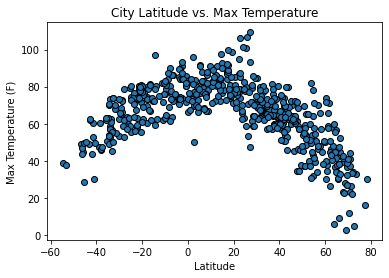

In [117]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp (F)"],edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("fig1.png")
plt.show()

## Latitude vs. Humidity Plot

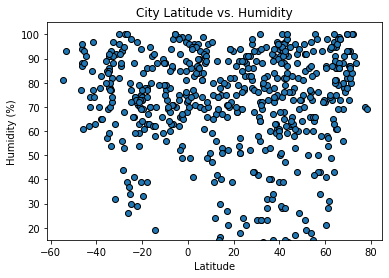

In [118]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity (%)"],edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

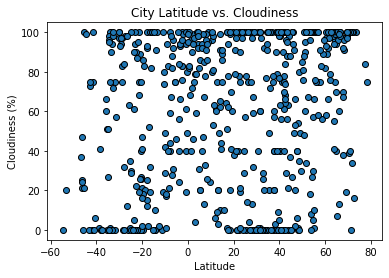

In [119]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness (%)"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

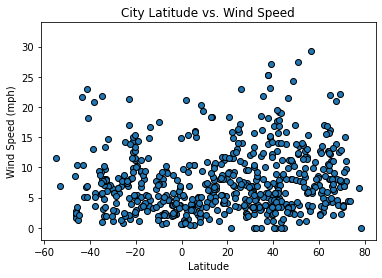

In [120]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed (mph)"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [121]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.72x + 90.29
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


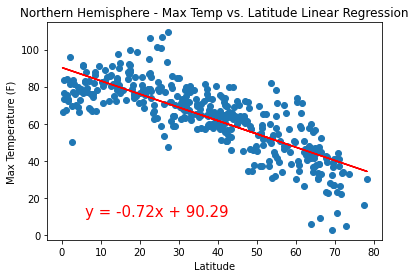

In [122]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Max Temp (F)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.76x + 84.91
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


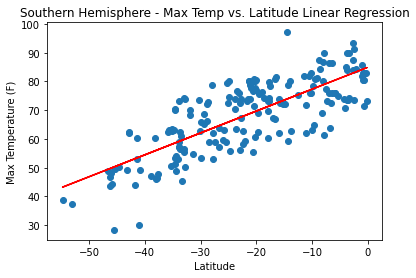

In [123]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Max Temp (F)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.11x + 64.71
The regression does not display much of a correlation between the data sets.


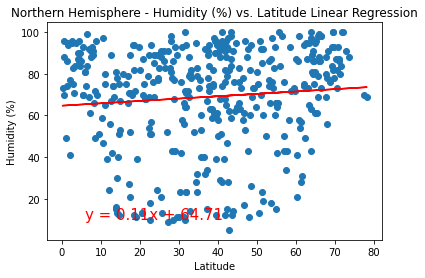

In [124]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Humidity (%)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 72.72
The regression does not display much of a correlation between the data sets.


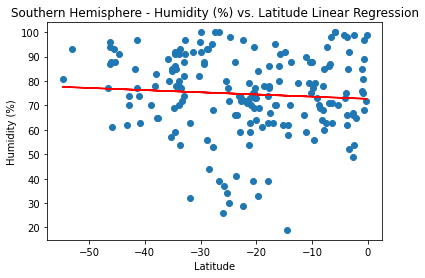

In [125]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Humidity (%)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.23x + 54.72
The regression does not display much of a correlation between the data sets.


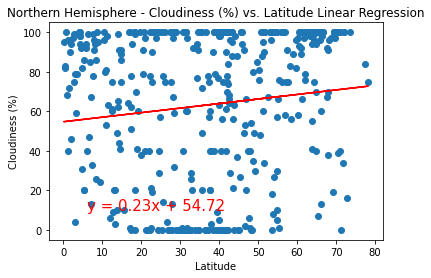

In [126]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Cloudiness (%)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.7x + 67.09
The regression does not display much of a correlation between the data sets.


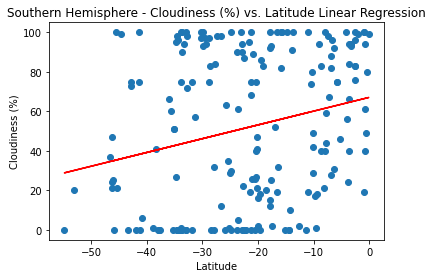

In [127]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Cloudiness (%)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 6.68
The regression does not display much of a correlation between the data sets.


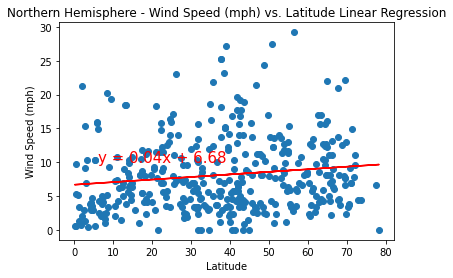

In [128]:
x_values = pd.to_numeric(northern_df['Latitude'])
y_values = pd.to_numeric(northern_df['Wind Speed (mph)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 5.4
The regression does not display much of a correlation between the data sets.


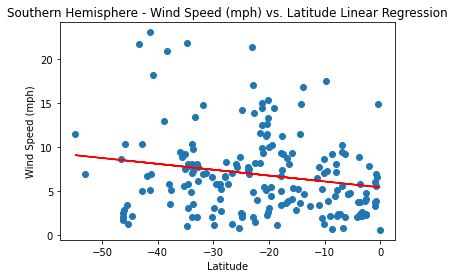

In [129]:
x_values = pd.to_numeric(southern_df['Latitude'])
y_values = pd.to_numeric(southern_df['Wind Speed (mph)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig12.png")
plt.show()